In [1]:
#datasets : 
#COVID 19 - https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
#https://www.ncbi.nlm.nih.gov/nuccore/MW560960.1?report=fasta&log$=seqview 
#https://www.ncbi.nlm.nih.gov/nuccore/MW598454.1?report=fasta&log$=seqview


In [ ]:
#1
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#2
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#3
downloaded = drive.CreateFile({'id':'17YFvxteb66TaBa4gfJw47hQ2PhVd5yDV'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sequence.fasta') 


In [ ]:
#4
!pip install biopython
!pip install Squiggle

     |████████████████████████████████| 2.3MB 5.7MB/s 
  Created wheel for pyfaidx: filename=pyfaidx-0.5.9.5-cp37-none-any.whl size=25142 sha256=74cf3c556f13eae0f3fdeb50265165e04f72a1280e901746da142006431d9ae3
  Stored in directory: /root/.cache/pip/wheels/d8/31/5f/8053c426a420cc407492252723f20e9a9c7e717909d7e08a9e
Successfully built pyfaidx


In [ ]:
#5
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
#6
from Bio import SeqIO
for sequence in SeqIO.parse('sequence.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [ ]:
#7
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('sequence.fasta', "fasta")
print(DNAsequence)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [ ]:
#8
DNA = DNAsequence.seq #Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

In [ ]:
#9
#Identifying the amino acids
#Identifying protein length
#Identifying mrna length
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
#10
#printig standard codon table
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [ ]:
#11
#Identify all the Proteins (chains of amino acids)
#identifying functional proteins
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


In [ ]:
#12
#identifying protein of interest,percentage of amino acids,molecular weight,aromaticity,flexibilty,isoelectric point,secondary structure fraction
from __future__ import division
poi_list = []
MW_list=[]
from Bio.SeqUtils import ProtParam
for record in Proteins[:5]:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    print(POI)
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    poi_list.append(POI)
    print("poi_list = ",poi_list)
    print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    print("Molecular weight = ", MW_list)
    print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    print("Isoelectric point = ", X.isoelectric_point())
    print("Secondary structure fraction = ",X.secondary_structure_fraction())




{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
poi_list =  [{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}, {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}]
Amino acids percent =     {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.125, 'H': 0.0, 'I': 0.125, 'K': 0.125, 'L': 0.25, 'M': 0.0, 'N': 0.0, 'P': 0.125, 'Q': 0.0, 'R': 0.125, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.125}
Molecular weight =  [959.1858]
Aromaticity =  0.125
Flexibility =  []
Isoele

In [ ]:
#13
from collections import Counter

In [ ]:
#14
covid=SeqIO.read("sequence.fasta",'fasta')

In [ ]:
#15
print(covid)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [ ]:
#16
# Convert or Get the sequences
covid_seq = covid.seq
#17
# Check the length of each sequence
print("covid_seq ::",len(covid_seq))
#18
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC
#19
# Check the length of each sequence
print("GC content of covid_seq ::",GC(covid_seq))


covid_seq :: 29903
GC content of covid_seq :: 37.97277865097148


In [ ]:
#20
covid_protein = covid_seq.translate()

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
#21
print("covid_protein ::",len(covid_protein))

covid_protein :: 9967


In [ ]:
#22
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
#23
covid_analysed = ProteinAnalysis(str(covid_protein))

In [ ]:
#24
# Check for the Frequence of AA
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [ ]:
#25
#descinding order of frequency of proteins
covid_freq = Counter(covid_protein)

In [ ]:
#27
#most repeated proteins
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

<BarContainer object of 21 artists>

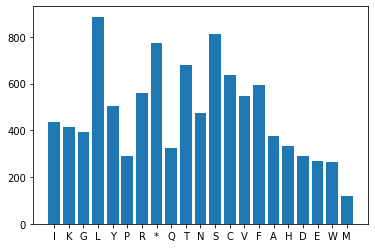

In [ ]:
#28
# Plot the Amino Acids against number of occurences
plt.bar(covid_freq.keys(), covid_freq.values())